In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("voice.csv")

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data = data[["label", "meanfreq", "median", "meanfun"]]
data["label"] = data["label"].map({"male":0, "female":1})
train, test = train_test_split(data, test_size=0.2)

In [5]:
x_meanfreq = train["meanfreq"].values.reshape(-1, 1)
x_median   = train["median"].values.reshape(-1, 1)
x_meanfun  = train["meanfun"].values.reshape(-1, 1)
y          = train["label"].values

x_meanfreq_test = test["meanfreq"].values.reshape(-1, 1)
x_median_test   = test["median"].values.reshape(-1, 1)
x_meanfun_test  = test["meanfun"].values.reshape(-1, 1)
y_test          = test["label"].values

meanfun Model

In [6]:
model_meanfun = LogisticRegression().fit(x_meanfun, y)
x_predict = np.linspace(.055, .24, 20).reshape(-1, 1)
y_predict = model_meanfun.predict_proba(x_predict)
y_predict = y_predict[:,1]

In [7]:
r2_meanfun = model_meanfun.score(x_meanfun_test, y_test)
print("R2:", r2_meanfun)

R2: 0.9621451104100947


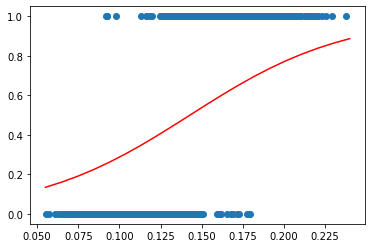

In [8]:
plt.scatter(x_meanfun, y)
plt.plot(x_predict, y_predict, color = "r")

median Model

In [9]:
model_median = LogisticRegression().fit(x_median, y)
x_predict = np.linspace(.01, .26, 40).reshape(-1, 1)
y_predict = model_median.predict_proba(x_predict)
y_predict = y_predict[:,1]

In [10]:
r2_median = model_median.score(x_median_test, y_test)
print("R2:", r2_median)

R2: 0.6214511041009464


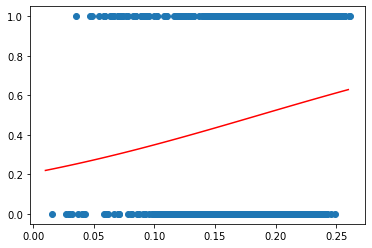

In [11]:
plt.scatter(x_median, y)
plt.plot(x_predict, y_predict, color = "r")

meanfreq Model

In [12]:
model_meanfreq = LogisticRegression().fit(x_meanfreq, y)
x_predict = np.linspace(.04, .25, 40).reshape(-1, 1)
y_predict = model_meanfreq.predict_proba(x_predict)
y_predict = y_predict[:,1]

In [13]:
r2_meanfreq = model_meanfreq.score(x_meanfreq_test, y_test)
print("R2:", r2_median)

R2: 0.6214511041009464


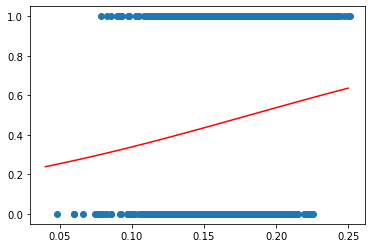

In [14]:
plt.scatter(x_meanfreq, y)
plt.plot(x_predict, y_predict, color = "r")